# Logistic Regression Coursework
This notebook is supposed to help with your understanding of the code by providing visual insights. It is not graded and solely for that purpose.

In [13]:
# Let's import your code and matplotlib
from logistic_regression_assignment import *
import matplotlib.pyplot as plt


%matplotlib inline


# Let's load some example data:
x, y, x_test = load_data()
D = x.shape[1]

In [73]:
%autoreload

## Random Prediction
This tests your prediction function.

In [74]:
np.matmul(np.array([1,2,23,3]),np.array([1,2,23,3]))

543

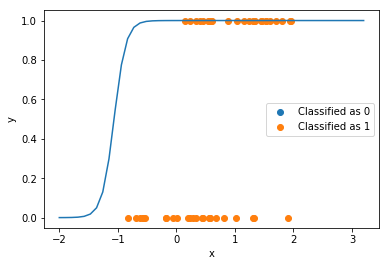

In [75]:
rn.seed(42)
theta = rn.normal(loc=10, size=(D, 1))
y_hat = predict_binary(x, theta).squeeze()
plt.scatter(x[y_hat < 0.5, 1], y[y_hat < 0.5])
plt.scatter(x[y_hat > 0.5, 1], y[y_hat > 0.5])
plt.legend(['Classified as 0', 'Classified as 1'])
plt.plot(x_test[:,1], predict(x_test, theta))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Maximum Likelihood Estimate
This tests your MLE and plots the predictions on the example data.

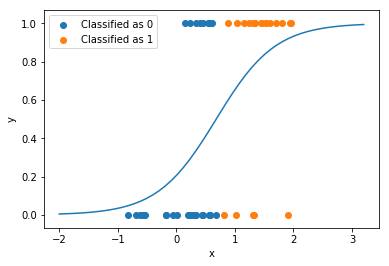

array([-1.35130992,  1.983651  ])

In [76]:
theta_ml = max_lik_estimate(x, y)
y_hat = predict_binary(x, theta_ml).squeeze()
plt.scatter(x[y_hat < 0.5, 1], y[y_hat < 0.5])
plt.scatter(x[y_hat > 0.5, 1], y[y_hat > 0.5])
plt.legend(['Classified as 0', 'Classified as 1'])
plt.plot(x_test[:,1], predict(x_test, theta_ml))
plt.xlabel('x')
plt.ylabel('y')
plt.show()
theta_ml

## Maximum A Posteriori
This tests your MAP solution and plots the predictions on the example data.

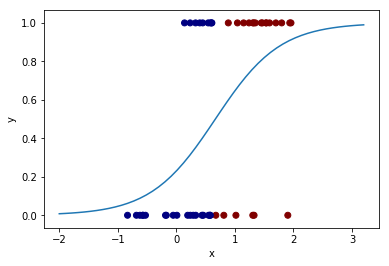

array([-1.20688967,  1.81202051])

In [77]:
m = np.zeros((D, 1))
S = 5 * np.eye(D)

theta_map = map_estimate(x, y, m, S)
y_hat = predict_binary(x, theta_map)
plt.scatter(x[:, 1], y, c=y_hat, cmap='jet')
plt.plot(x_test[:, 1], predict(x_test, theta_map))
plt.xlabel('x')
plt.ylabel('y')
plt.show()
theta_map

## Laplace Approximation
This tests your Laplace approximation and compares it to the true distribution.

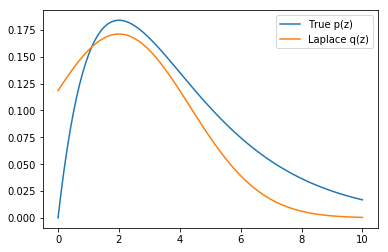

array([0.11843493, 0.12280342, 0.1270943 , 0.13128847, 0.13536677,
       0.13931006, 0.14309941, 0.14671622, 0.1501424 , 0.15336051,
       0.15635388, 0.15910679, 0.1616046 , 0.16383385, 0.16578244,
       0.16743966, 0.16879637, 0.16984501, 0.17057973, 0.17099642,
       0.17109272, 0.1708681 , 0.17032382, 0.16946293, 0.16829027,
       0.16681236, 0.1650374 , 0.16297518, 0.16063698, 0.15803544,
       0.15518453, 0.15209932, 0.14879594, 0.14529137, 0.14160334,
       0.13775016, 0.13375058, 0.12962363, 0.12538848, 0.12106428,
       0.11667004, 0.11222448, 0.10774591, 0.10325211, 0.09876022,
       0.09428662, 0.08984688, 0.08545568, 0.08112669, 0.0768726 ,
       0.072705  , 0.06863442, 0.06467025, 0.0608208 , 0.05709323,
       0.05349362, 0.05002699, 0.04669729, 0.04350748, 0.04045956,
       0.03755461, 0.03479288, 0.0321738 , 0.02969609, 0.0273578 ,
       0.02515637, 0.02308872, 0.02115127, 0.01934007, 0.01765081,
       0.0160789 , 0.01461951, 0.01326765, 0.01201823, 0.01086

In [78]:
z = np.linspace(0,10,100)
p = stats.chi2.pdf(z, 4)

q = laplace_q(z)
plt.plot(z, p)
plt.plot(z, q)
plt.legend(['True p(z)', 'Laplace q(z)'])
plt.show()

## Laplace Approximation of Logistic Regression
This tests your Laplace approximation of the logistic regression an plots multiple sample regressions.

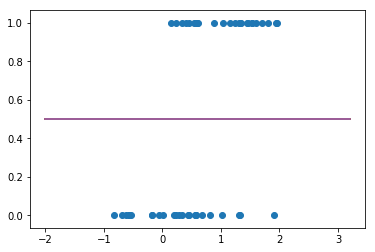

In [54]:
m = np.zeros((D, 1))
S = 5*np.eye(D)
nb_samples = 5

theta_map, S_post = get_posterior(x, y, m, S)
plt.scatter(x[:,1], y)
for i in range(nb_samples):
    th = np.random.multivariate_normal(theta_map.squeeze(), S_post)
    plt.plot(x_test[:,1], predict(x_test, th))
plt.show()

## Metropolis Sampling
This compares your Metropolis sampling to the Laplace posterior.

LinAlgError: singular matrix

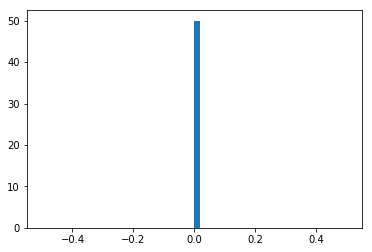

In [7]:
nb_iter = 10000
samples = metropolis_hastings_sample(x, y, m, S, nb_iter)

_,_,h1 = plt.hist(samples[:,1], bins=50, density=True)
h2, = plt.plot(np.linspace(0,10),
         stats.multivariate_normal.pdf(np.linspace(0,10), theta_map[1], S_post[1,1]), 'r')
plt.legend([h1[0], h2], ['Metropolis samples', 'Laplace posterior'])
plt.xlabel('theta')
plt.show()